# 1. Estimate Effective population size

population estimates from NJ, mark recapture 

1/13/09 26,438

2/14/10 1,756

4/11/11 539

3/15/12 593

3/21/13 572

3/4/14 471

2015 450

30% of population is non breeding

95% of adults are breeding
(Frick 2009)http://onlinelibrary.wiley.com/doi/10.1111/j.1365-2656.2009.01615.x/full

Let's say
Average lifespan is 12 years
Generation time is 6 years. 

Nb=.665(Nc)

From Waples 2002 http://www.genetics.org/content/161/2/783.long#disp-formula-1
Harmonic mean of Nb over generation time  x g

In [7]:
(6/(1/(.665*26438)+1/(.665*1756)+1/(.665*539)+1/(.665*593)+1/(.665*572)+1/(.665*471)+1/(.665*450)))*6

[1] 2337.31

# 2. Compare change in frequency between nuclear and mitochondrial

In [8]:
## Function to do Wright-Fisher simulation with selection and a finite sample size
# using priors on Ne, s, and initial allele frequency
# Sample at two time points

# i is a dummy argument so that it can be used with sapply and parSapply
# f1min: the minimum for the initial allele frequency uniform prior
# f1max:
# smin: the minimum for the selection coefficient uniform prior
# smax:
# c1: the size of the first sample (in # chromosomes)
# c2: the size of the second sample (in # chromosomes)
# gen: the number of generations
# ne: a vector of possible Ne values. Simulation picks one to use.
# h: dominance effect
wfs <- function(i, f1min=f1min, f1max=f1max, smin=smin, smax=smax, c1=c1, c2=c2, gen=gen, ne=ne, h=h){ 
	# choose parameters for this simulation
	f1 <- runif(1, min=f1min, max=f1max) # starting allele frequency
	s <- runif(1, min=smin, max=smax) # selection coefficient
	if(length(ne)>1) thisne <- round(sample(ne, 1)) # ne has to be integer for binomial sampling
	if(length(ne)==1) thisne <- round(ne)
	
#	print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,thisne,x)/thisne
#		print(paste(x,p))
	}
	f2 <- p

	f1samp <- rbinom(1,c1,f1)/c1 # first sample allele frequency
	f2samp <- rbinom(1,c2,f2)/c2 # second sample allele frequency

	# calculate summary statistics (Foll et al. 2015 Molecular Ecology Resources)
#	stats <- sumstats(f1samp, f2samp, c1, c2, gen)
	
	# return values
#	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp, fsdprime=stats[1], fsiprime=stats[2])
	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp)
	return(out)
}

In [9]:
data=rep(1,1000)

In [10]:
outputn=lapply(data, wfs, f1min=0.005, f1max=.05, smin=0, smax=0, c1=50, c2=50, gen=1, ne=2000, h=0)
outputm=lapply(data, wfs, f1min=0.005, f1max=.05, smin=0, smax=0, c1=25, c2=25, gen=1, ne=500, h=0)
mito=as.data.frame(do.call(rbind, outputm))
mito$diffsamp=abs(mito$f1samp-mito$f2samp)
mito$difffreq=abs(mito$f1-mito$f2)
nuc=as.data.frame(do.call(rbind, outputn))
nuc$diffsamp=abs(nuc$f1samp-nuc$f2samp)
nuc$difffreq=abs(nuc$f1-nuc$f2)

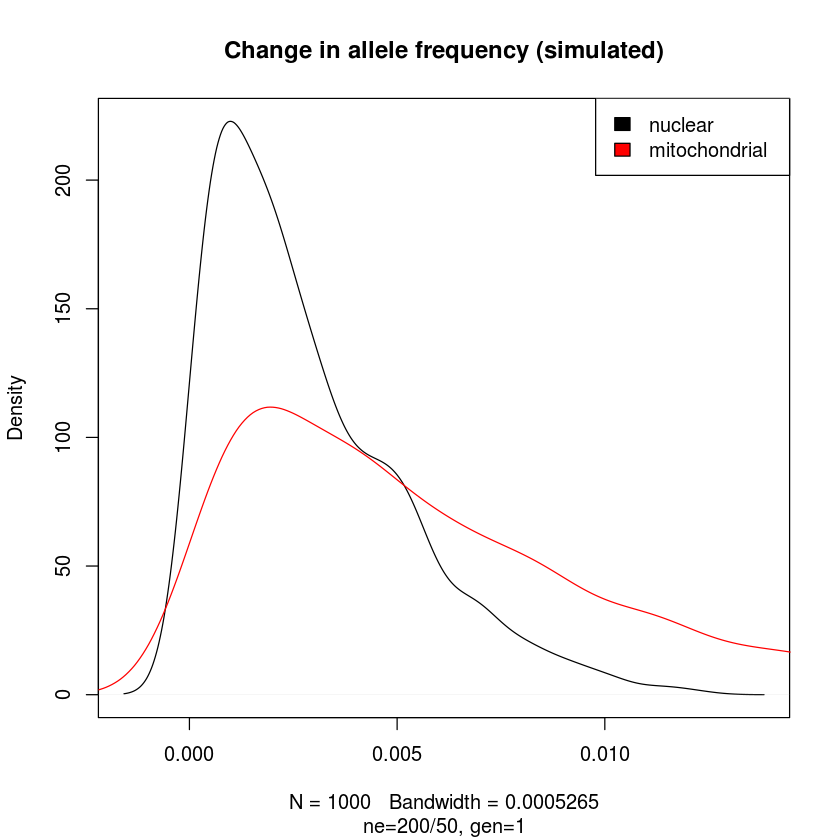

In [11]:
plot(density(nuc$difffreq), main="Change in allele frequency (simulated)", sub="ne=200/50, gen=1")
     lines(density(mito$difffreq), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

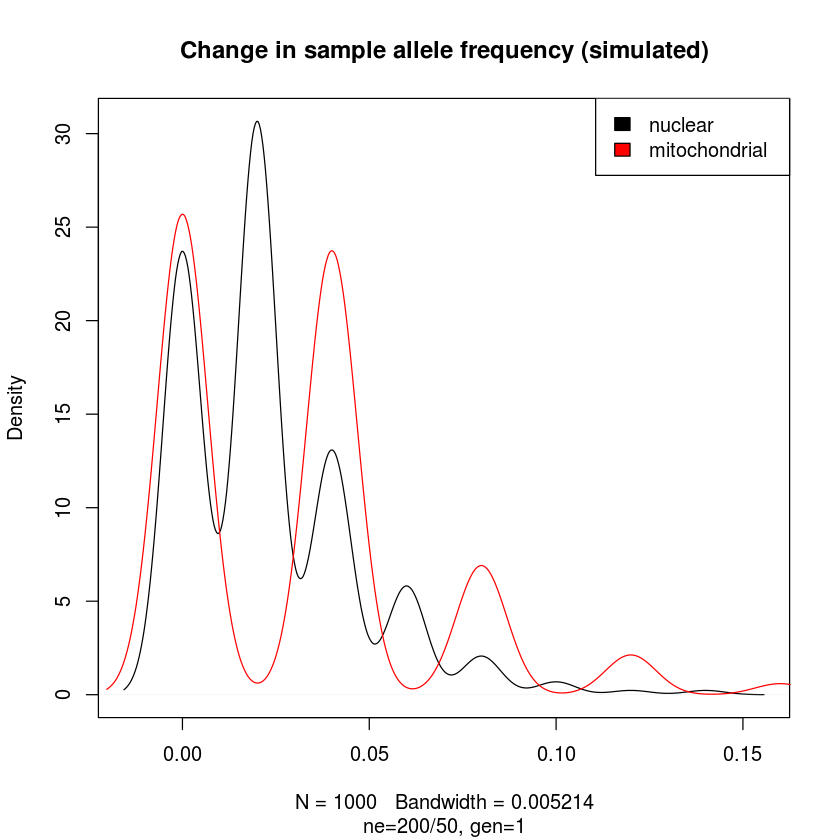

In [12]:
plot(density(nuc$diffsamp), main="Change in sample allele frequency (simulated)", sub="ne=200/50, gen=1")
     lines(density(mito$diffsamp), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

# 3. Simulate change in frequency due to drift for high allele freq change snps

In [1]:
setwd("~/WGS/SNPS/All_mylu/mafs/")

In [11]:
nje_files = paste0("NJE_jack/NJ_E", 1:22, ".filelist_filt.mafs")

In [17]:
NJE=lapply(nje_files, read.table, header=T)

In [15]:
nje_f=read.table("NJE_jack/NJ_E.filelist_filt.mafs", header=T)

In [16]:
head(nje_f)

chromo,position,major,minor,knownEM,unknownEM,phat,nInd
GL429767,10265656,T,C,0.843202,0.843202,0.833381,15
GL429767,24450613,T,A,0.450858,0.173925,0.447447,8
GL429767,35761989,A,G,0.400951,0.400950,0.387835,14
GL429767,39819883,G,C,0.566047,0.566044,0.555731,15
GL429767,45231339,T,G,0.157642,0.157648,0.152617,18
GL429767,56161793,A,G,0.110827,0.110826,0.129897,14


Need to write a function that takes mafs where nind n-1 != nind n, and calculates the bias? and standard error, then apply fucntion to list of dataframes by row. 

In [1]:
genoprobs=read.csv("~/WGS/SNPS/All_mylu/snps/Candidate_SNPs_geno_mInd.csv", header=FALSE)

In [1]:
genotest=read.csv("~/WGS/SNPS/All_mylu/genoprob/Test_snps.csv", header=FALSE)

In [1]:
snps=read.csv("~/WGS/SNPS/All_mylu/snps/njnyvteu40.csv", header=TRUE)

In [2]:
head(snps)

X,Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,⋯,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff
1,GL429767,10265656,225945,T,C,0.843202,0.843202,0.833381,15,⋯,0.708026,0.732224,11,T,C,0.260631,0.260634,0.244548,13,0.447392
2,GL429767,39819883,600380,G,C,0.566047,0.566044,0.555731,15,⋯,0.488130,0.469819,13,G,C,0.152466,0.056189,0.159319,11,0.431941
3,GL429768,4318783,1013835,C,T,0.759476,0.759475,0.741288,15,⋯,0.635064,0.614687,12,C,T,0.143789,0.143787,0.149299,12,0.491277
4,GL429768,11968353,1125438,T,C,0.719161,0.719157,0.724949,15,⋯,0.635200,0.610357,14,T,C,0.203301,0.203304,0.134005,13,0.431896
5,GL429769,6378055,1499037,A,G,0.589184,0.589182,0.583500,12,⋯,0.803113,0.797205,9,A,G,0.305177,0.305191,0.287608,14,0.497922
6,GL429775,9425832,2839800,C,T,0.524064,0.524056,0.537572,13,⋯,0.431001,0.436655,12,C,T,0.099251,0.029442,0.124248,9,0.401559


In [71]:
genoprobs2=data.frame(lapply(genoprobs, function(x)
    {gsub("0.272212|0.499055|0.228733|0.254753|0.499955|0.245292|0.291388|0.496831|0.211781|0.294581|0.496344|0.209075|0.26754|0.499405|0.233055|0.284989|0.497709|0.217302|0.316810|0.492098|0.191093|0.264308|0.499602|0.23609|0.25613|0.499926|0.243944|0.371502|0.476015|0.152483", NA, x)
    }))
#genoprobs2=genoprobs2[3:NCOL(genoprobs2)]

In [2]:
genoprobs2=genotest


In [10]:
samples=read.table("/local/home/sarahgw/WGS/Sequences/filelists/All_Mylu.filelist", header=FALSE)

In [3]:
# 23 - 42
NJU_genoprobs=genoprobs2[,69:128] 
# 64 - 85
NYU_genoprobs=genoprobs2[,192:257] 
# 113 - 132
VTU_genoprobs=genoprobs2[,339:398]

Try calculating allele frequencies from Exposed populations, do they match the calculated mafs?

In [4]:
# 23 - 42
NJE_genoprobs=genoprobs2[,3:68] 
# 64 - 85
NYE_genoprobs=genoprobs2[,129:191] 
# 113 - 132
VTE_genoprobs=genoprobs2[,258:338] 

In [26]:
NROW(NJE_genoprobs)

[1] 10

In [22]:
test=(NJE_genoprobs[11,])
test=as.numeric(test[!is.na(test)])

In [23]:
test2=(NJU_genoprobs[11,])
test2=as.numeric(test2[!is.na(test2)])

In [24]:
probs=numeric()
for(i in seq(1,length(test),3)) {
             probs[i]=test[i+1]+2*(test[i+2])
}
a=sum(probs, na.rm=TRUE)
a/(2*(length(test)/3))
gp2af = function(POP_genoprobs) {   
    apply(POP_genoprobs, 1, gp2afi)
}

ERROR: Error in seq.default(1, length(test), 3): wrong sign in 'by' argument


In [21]:
probs=numeric()
for(i in seq(1,length(test2),3)) {
        probs[i]=test2[i+1]+2*(test2[i+2])
}
a=sum(probs, na.rm=TRUE)
a/(2*(length(test2)/3))

[1] 0.004764675

In [21]:
(2*(length(test)/3))

[1] 139.3333

In [33]:
test[i+3]

[1] 0.685719

In [69]:
NCOL(NJU_genoprobs)
NCOL(NYU_genoprobs)
NCOL(VTU_genoprobs)

[1] 60

[1] 66

[1] 60

In [7]:
NCOL(NJE_genoprobs)
NCOL(NYE_genoprobs)
NCOL(VTE_genoprobs)

[1] 66

[1] 63

[1] 81

function to calculate allele frequency from genotype probs:

In [23]:
##Loop through differnet snps in output from angsd
#take groups of three probabilities and use that to sample from possible genotypes
#count number of times minor allele is found, divide by N*2 
#populate f1samps dataframe to feed to wfs by samp
    gp2afi = function(v) {
        genosamp=numeric()
        count = length(v)/3
        for(i in seq(1,length(v),3)) {
            three_probs = v[i:(i+2)]
            if (any(is.na(three_probs))) {
                count = count - 1
            }
            else {
                genosamp[i] = sample(c(0, 1, 2), size = 1, prob=three_probs)
            }
        }
        f1samps = (sum(genosamp, na.rm=TRUE))/(2*(count))
        return(f1samps)
    }
gp2af = function(POP_genoprobs) {   
    apply(POP_genoprobs, 1, gp2afi)
}

In [26]:
test=gp2af(NJU_genoprobs)

In [27]:
test

[1] 0.4230769 0.5555556 0.5000000 0.3500000 0.6666667 0.4285714 0.1666667
 [8] 0.4000000 0.5000000 0.3214286

Malins function to simulate drift:

In [24]:
## Function to do Wright-Fisher simulation with selection and a finite sample size
# using priors on Ne and s
# and specify initial sample allele frequency, f1samp (compare to wfs.r, which sets a prior on initial true allele freq f1)
# Sample at two time points

# f1samp: the initial sample allele frequency. Initial true allele freq will be sampled with this constraint.
# smin: the minimum for the selection coefficient uniform prior
# smax:
# c1: the size of the first sample (in # chromosomes)
# c2: the size of the second sample (in # chromosomes)
# gen: the number of generations
# ne: a vector of possible Ne values. Simulation picks one to use.
# h: dominance effect

wfs_byf1samp <- function(f1samp=0.5, smin=-1, smax=1, c1=58, c2=48, gen=20, ne=100, h=0.5){ 
	tol <- .Machine$double.eps^0.5 # tolerane for equality. default tolerance in all.equal

	# make sure f1samp is possible given initial sample size (c1)
	# test whether difference from a possible sample size is less than tol
	if(!any(abs(f1samp - ((0:c1)/c1)) < tol)) return(NA)
        #stop(paste('f1samp=', f1samp, 'not possible given c1=', c1))

	# choose parameters for this simulation
		s <- runif(1, min=smin, max=smax) # selection coefficient
	if(length(ne)>1) thisne <- round(sample(ne, 1)) # ne has to be integer for binomial sampling
	if(length(ne)==1) thisne <- round(ne)

	# choose initial population frequency
	# brute force method: keep picking possible f1s until one produces the correct f1samp
	thisf1 <- -100
	while(abs(thisf1 - f1samp) >= tol){
		f1 <- runif(1, min=0, max=1) # pick a starting allele frequency
		thisf1 <- rbinom(1,c1,f1)/c1 # pick a first sample allele frequency that corresponds
	}
	
#	print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,thisne,x)/thisne
#		print(paste(x,p))
	}
	f2 <- p

	f2samp <- rbinom(1,c2,f2)/c2 # second sample allele frequency

	# calculate summary statistics (Foll et al. 2015 Molecular Ecology Resources)
#	stats <- sumstats(f1samp, f2samp, c1, c2, gen)
	
	# return values
#	out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp, fsdprime=stats[1], fsiprime=stats[2])
	#out <- c(ne=thisne, f1=f1, s=s, gen=gen, f2=f2, f1samp=f1samp, f2samp=f2samp)
	out=f2samp
        return(out)
}




In [114]:
if (is.na(NA)) {
    print("NA")
}

[1] "NA"


Run this part in a screen since it takes a while:
source("~/WNS_Notebooks/WNS_WGS/Scripts/AlleleFreqChange_Functions.r")
genoprobs=read.csv("/local/home/sarahgw/WGS/SNPS/All_mylu/snps/Candidate_SNPs_geno.csv", header=FALSE)
NJU_genoprobs=genoprobs[,69:128] 
NYU_genoprobs=genoprobs[,192:257]
VTU_genoprobs=genoprobs[,339:398]

Calculate allele freqs from genotype probabilities:

In [145]:
NJU_f1samp=as.data.frame(replicate(10, gp2af(NJU_genoprobs)))
#NYU_f1samp=as.data.frame(replicate(10, gp2af(NYU_genoprobs)))
#VTU_f1samp=as.data.frame(replicate(10, gp2af(VTU_genoprobs)))

In [146]:
NJU_f1samp

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
"0, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 2, NA, NA, 1, NA, NA, NA, NA, NA, 2, NA, NA, 0, NA, NA, 2, NA, NA, 2, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, 0","1, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, 2, NA, NA, 2, NA, NA, NA, NA, NA, 2, NA, NA, 1, NA, NA, 2, NA, NA, 2, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, 1","0, NA, NA, NA, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, 2, NA, NA, 1, NA, NA, NA, NA, NA, 1, NA, NA, 1, NA, NA, 1, NA, NA, 1, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, 1, NA, NA, 0","1, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, 1, NA, NA, 1, NA, NA, NA, NA, NA, 1, NA, NA, 1, NA, NA, 1, NA, NA, 2, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, 1, NA, NA, 1","0, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 2, NA, NA, 1, NA, NA, NA, NA, NA, 2, NA, NA, 1, NA, NA, 1, NA, NA, 2, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, 0","1, NA, NA, NA, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, 2, NA, NA, 2, NA, NA, NA, NA, NA, 1, NA, NA, 0, NA, NA, 1, NA, NA, 1, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, NA, NA, NA, 1, NA, NA, 0","0, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 1, NA, NA, 1, NA, NA, NA, NA, NA, 1, NA, NA, 0, NA, NA, 2, NA, NA, 1, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, 0","1, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 1, NA, NA, 2, NA, NA, NA, NA, NA, 1, NA, NA, 0, NA, NA, 2, NA, NA, 1, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, 0","1, NA, NA, NA, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, 1, NA, NA, 1, NA, NA, NA, NA, NA, 2, NA, NA, 1, NA, NA, 1, NA, NA, 2, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, 1","1, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, 2, NA, NA, 2, NA, NA, NA, NA, NA, 2, NA, NA, 1, NA, NA, 1, NA, NA, 1, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, 1"
"0, NA, NA, 1, NA, NA, NA, NA, NA, 0, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 2, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 1, NA, NA, 1, NA, NA, 1","0, NA, NA, 1, NA, NA, NA, NA, NA, 1, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 2, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 1, NA, NA, 2, NA, NA, 1","0, NA, NA, 1, NA, NA, NA, NA, NA, 0, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 2, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 2, NA, NA, 1, NA, NA, 1","0, NA, NA, 1, NA, NA, NA, NA, NA, 0, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 2, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 1, NA, NA, 2, NA, NA, 1","0, NA, NA, 1, NA, NA, NA, NA, NA, 1, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 2, NA, NA, 2, NA, NA, 1","0, NA, NA, 1, NA, NA, NA, NA, NA, 0, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 2, NA, NA, 2, NA, NA, 1","0, NA, NA, 1, NA, NA, NA, NA, NA, 0, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 2, NA, NA, 1, NA, NA, 1","0, NA, NA, 1, NA, NA, NA, NA, NA, 0, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA, NA, 2,

Calculate sample allele frequency after 1 generation:

In [92]:
NYE_f2samp=apply(NYU_f1samp, c(1,2), wfs_byf1samp, smin=0, smax=0, c1=44, c2=40, gen=1, ne=100, h=0)
NJE_f2samp=apply(NJU_f1samp, c(1,2), wfs_byf1samp, smin=0, smax=0, c1=40, c2=44, gen=1, ne=100, h=0)
VTE_f2samp=apply(VTU_f1samp, c(1,2), wfs_byf1samp, smin=0, smax=0, c1=40, c2=54, gen=1, ne=100, h=0)

ERROR: Error in match.fun(FUN): object 'wfs_byf1samp' not found


In [27]:
require(data.table)

Loading required package: data.table


In [2]:
#load pre-calculated files
NYE_f2samp=fread("~/WGS/SNPS/All_mylu/snps/NYE_f2samp.csv")
NJE_f2samp=fread("~/WGS/SNPS/All_mylu/snps/NJE_f2samp.csv")
VTE_f2samp=fread("~/WGS/SNPS/All_mylu/snps/VTE_f2samp.csv")

Read 10 rows and 1000000 (of 1000000) columns from 0.056 GB file in 00:00:09
Read 10 rows and 1000000 (of 1000000) columns from 0.163 GB file in 00:00:10
Read 10 rows and 1000000 (of 1000000) columns from 0.171 GB file in 00:00:10


In [28]:
#load pre-calculated files
NYU_f1samp=fread("~/WGS/SNPS/All_mylu/snps/NYU_f1samp.csv")
NJU_f1samp=fread("~/WGS/SNPS/All_mylu/snps/NJU_f1samp.csv")
VTU_f1samp=fread("~/WGS/SNPS/All_mylu/snps/VTU_f1samp.csv")

Read 10 rows and 1000000 (of 1000000) columns from 0.164 GB file in 00:00:12
Read 10 rows and 1000000 (of 1000000) columns from 0.056 GB file in 00:00:07
Read 10 rows and 1000000 (of 1000000) columns from 0.056 GB file in 00:00:08


In [29]:
NYU_f1samp=apply(NYU_f1samp, c(1,2), as.numeric)
NJU_f1samp=apply(NJU_f1samp, c(1,2), as.numeric)
VTU_f1samp=apply(VTU_f1samp, c(1,2), as.numeric)

calculate change in allele frequency:

In [25]:
#NYdiff=NYE_f2samp-NYU_f1samp
NYdiff=apply(NYdiff, c(1,2), as.numeric)

#VTdiff=VTE_f2samp-VTU_f1samp
VTdiff=apply(VTdiff, c(1,2), as.numeric)

#NJdiff=NJE_f2samp-NJU_f1samp
NJdiff=apply(NJdiff, c(1,2), as.numeric, as.character)

In [24]:
#load pre-calculated files
NYdiff=fread("~/WGS/SNPS/All_mylu/snps/NYdiff.csv")
NJdiff=fread("~/WGS/SNPS/All_mylu/snps/NJdiff.csv")
VTdiff=fread("~/WGS/SNPS/All_mylu/snps/VTdiff.csv")

Read 10 rows and 1000000 (of 1000000) columns from 0.175 GB file in 00:00:09
Read 10 rows and 1000000 (of 1000000) columns from 0.174 GB file in 00:00:09
Read 10 rows and 1000000 (of 1000000) columns from 0.182 GB file in 00:00:10


Average 3 populations:

In [26]:
diff_list=list(NYdiff, NJdiff, VTdiff)
NJNYVT=apply(simplify2array(diff_list), 1:2, mean)

Plots of 1 million simulations for each SNP. Change in allele freqency

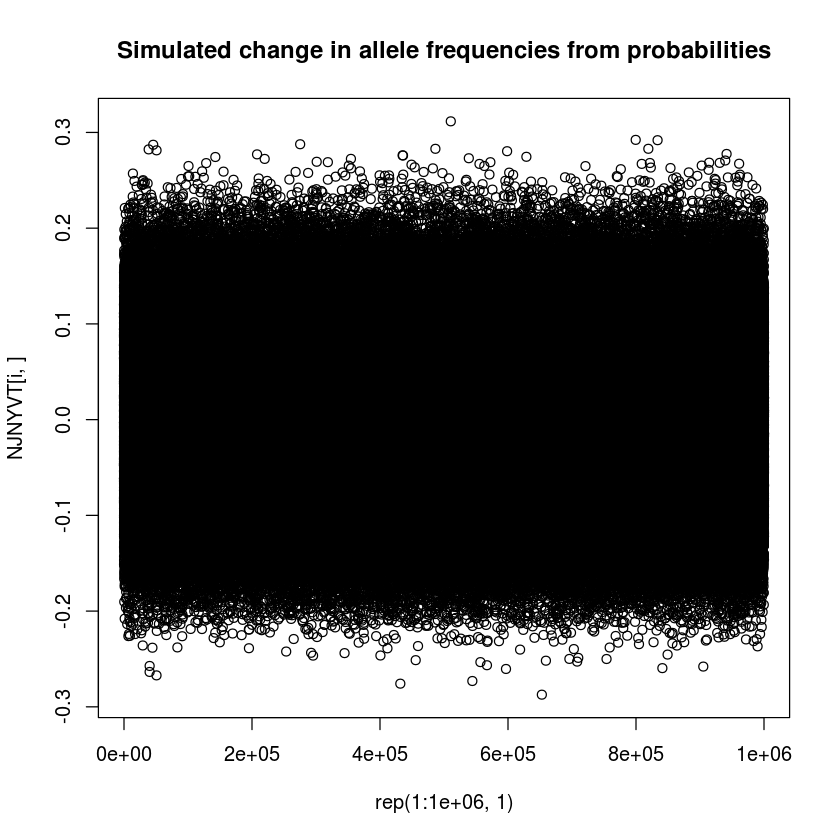

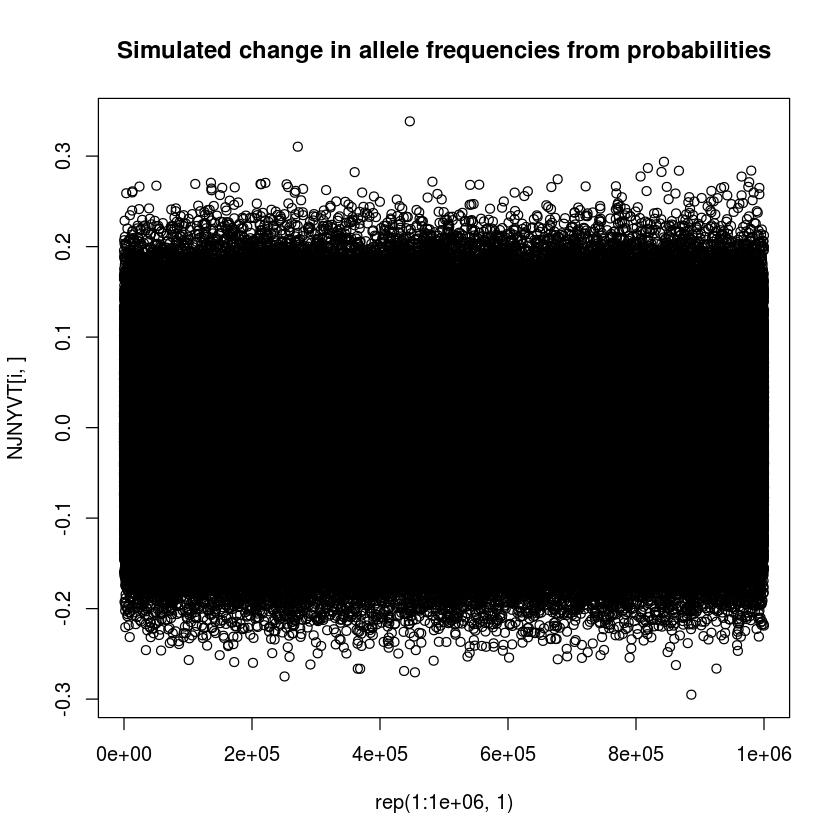

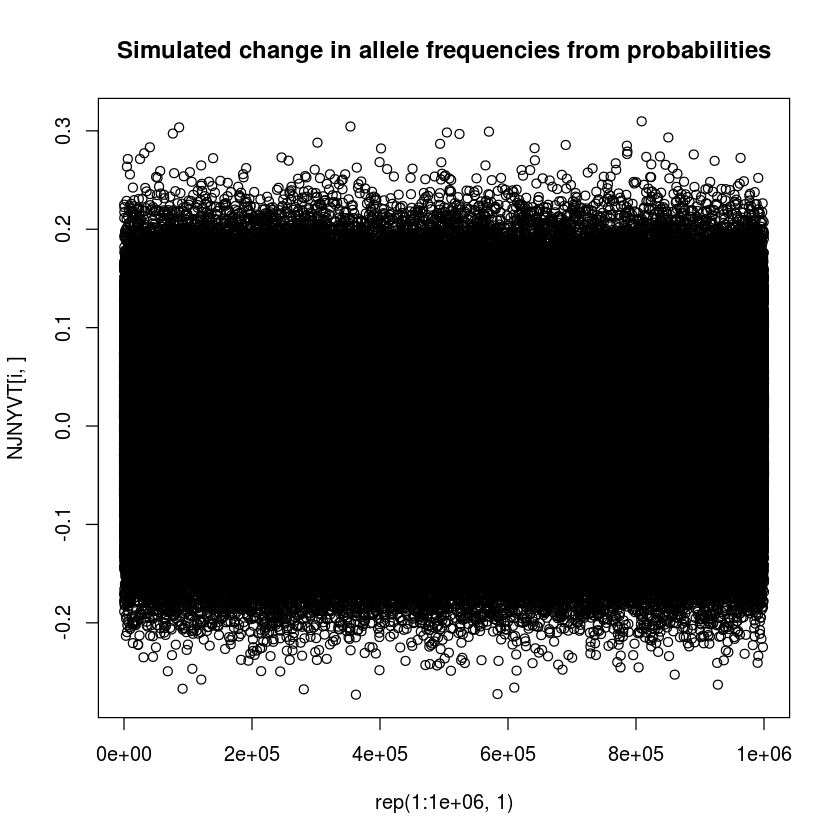

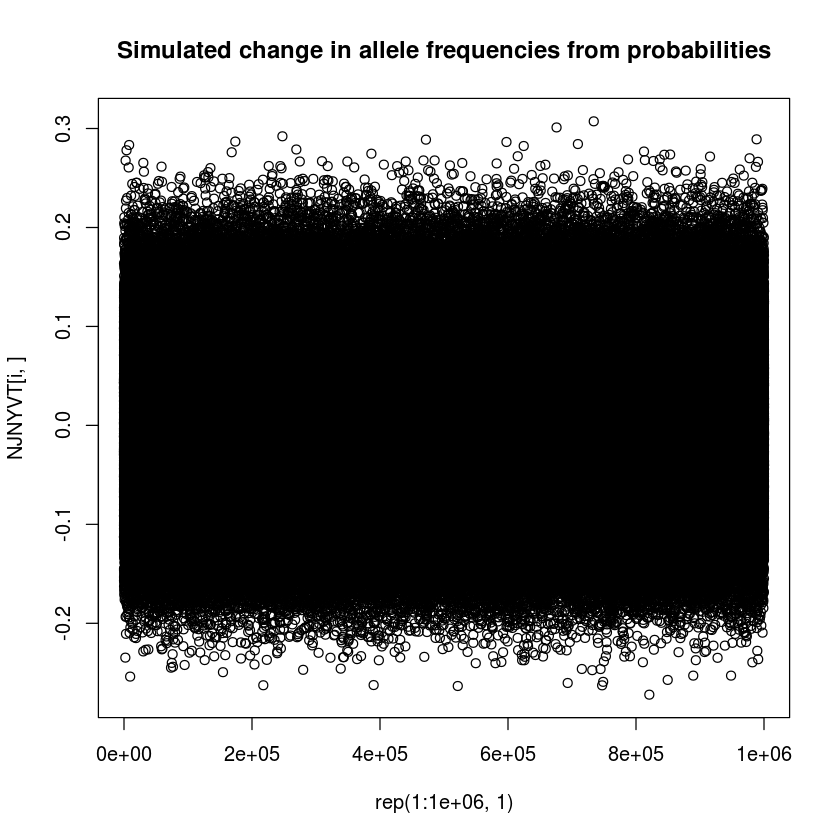

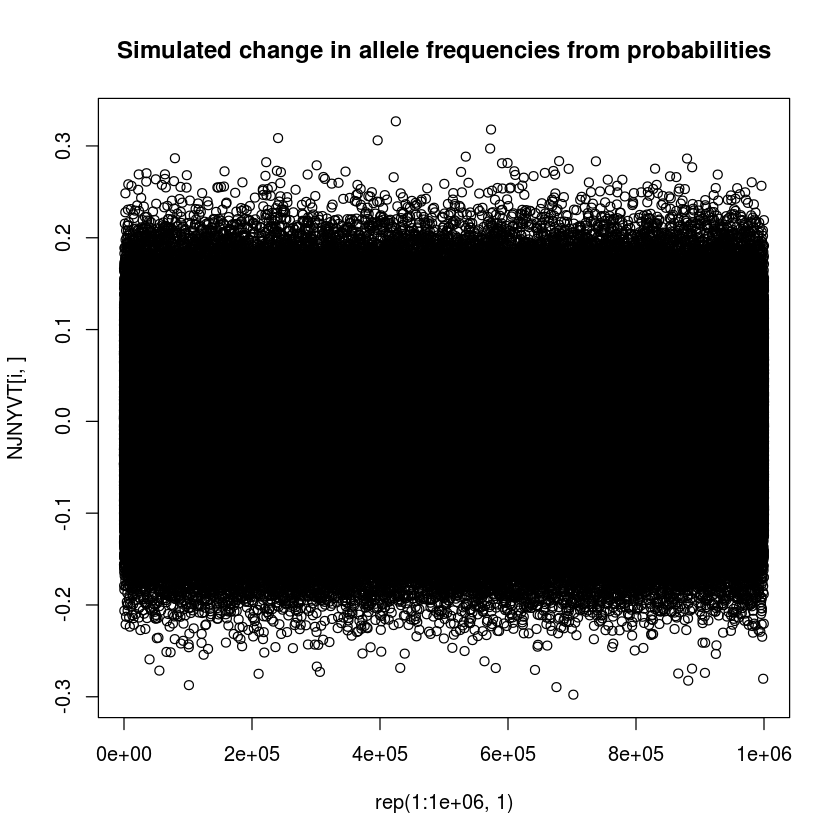

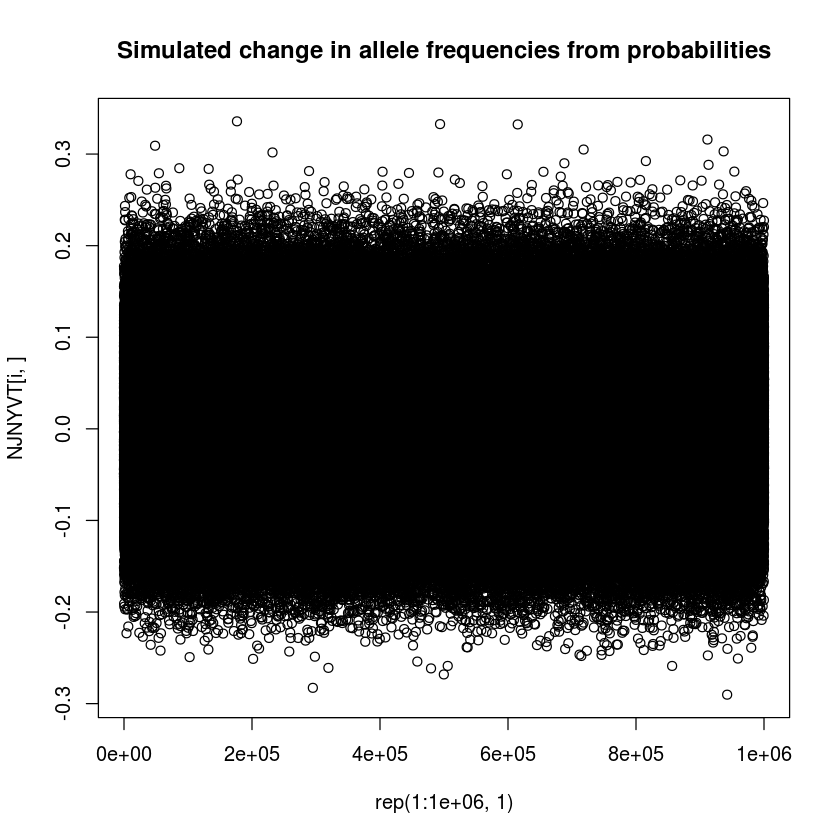

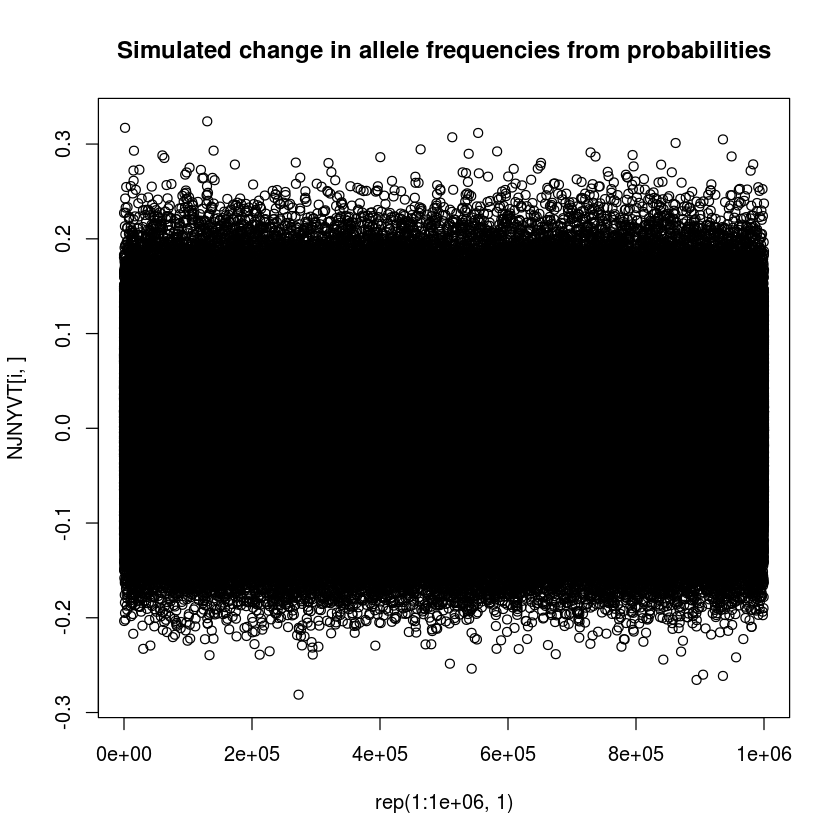

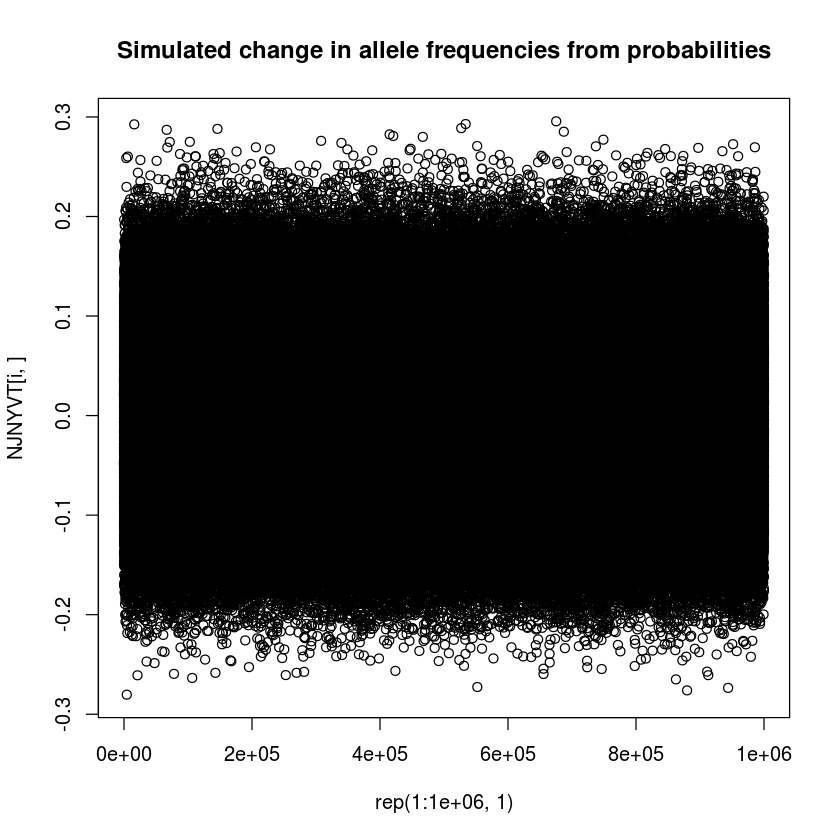

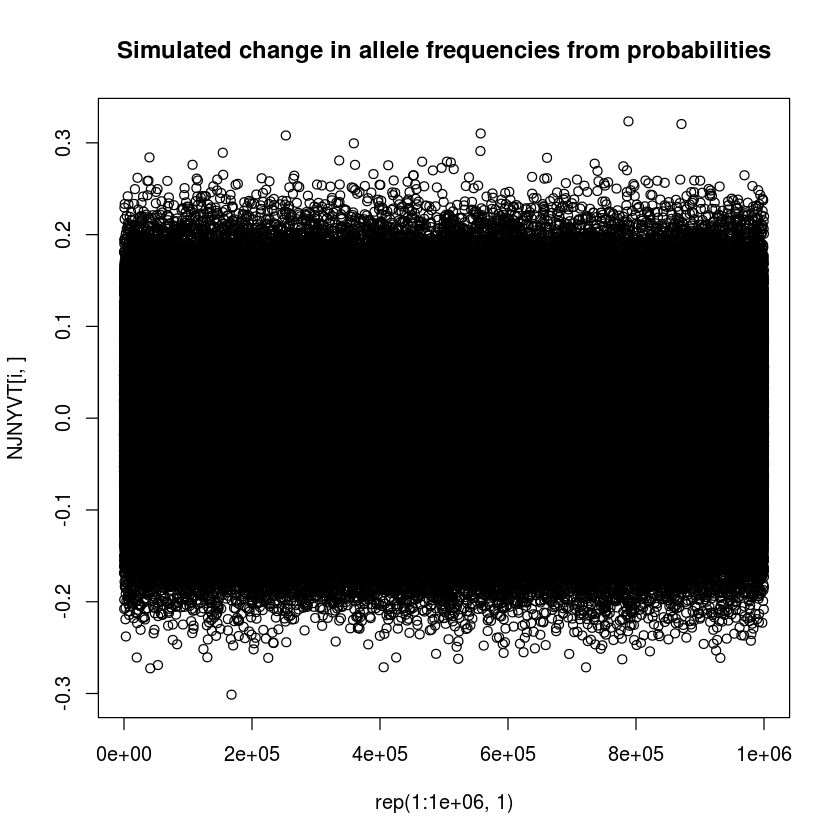

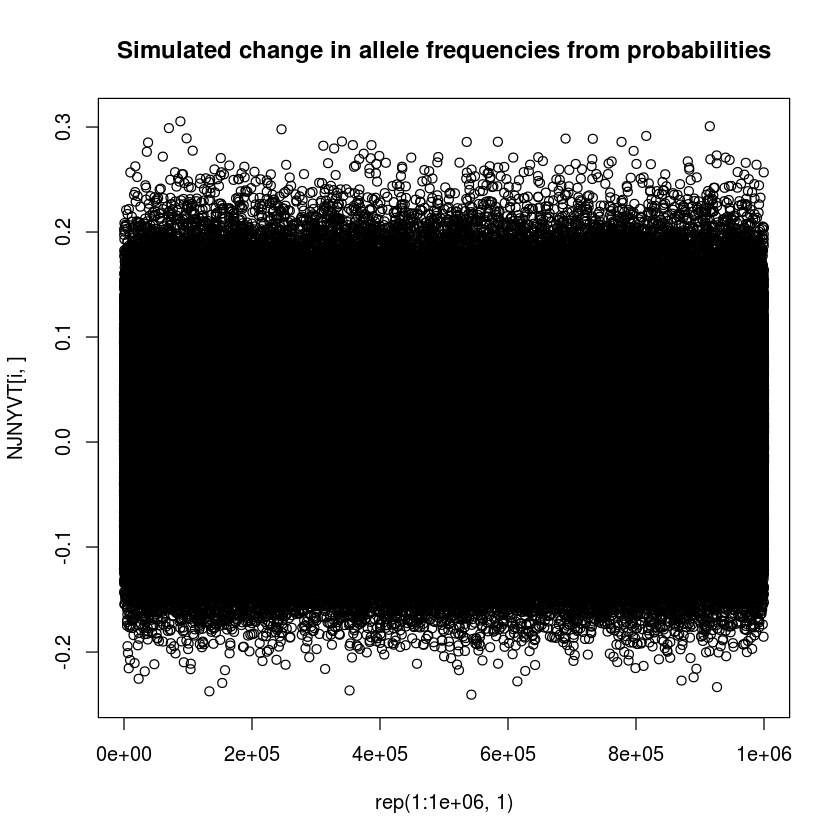

In [27]:
for (i in 1:NROW(NJNYVT)){
    plot(rep(1:1000000,1), NJNYVT[i,], main="Simulated change in allele frequencies from probabilities")
}

Compare actual minor allele frequencies to those calculated from gps

In [1]:
njnyvt50pos=read.csv("~/WGS/SNPS/All_mylu/snps/Candidate_SNPs_NJNYVT.csv")

In [50]:
VTU=hist(njnyvt50pos$Maf_VTU, plot=FALSE, breaks=14)
NYU=hist(njnyvt50pos$Maf_NYU, plot=FALSE, breaks=20)
NJU=hist(njnyvt50pos$Maf_NJU, plot=FALSE, breaks=1)

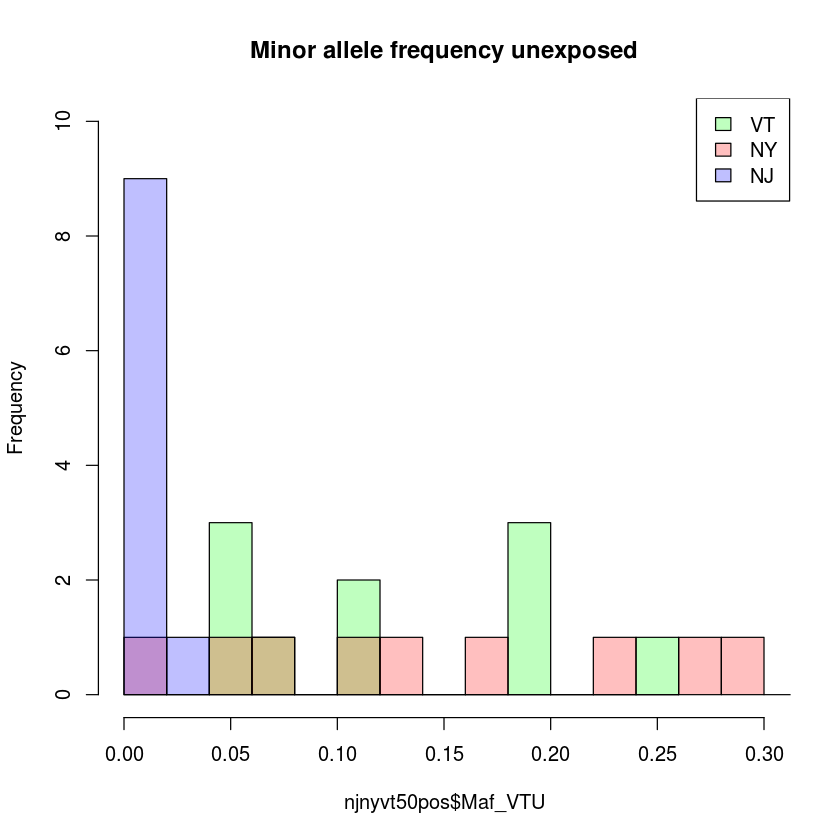

In [62]:
plot(VTU, main="Minor allele frequency unexposed", col=rgb(0,1,0,1/4), ylim=c(0,10), xlim=c(0,0.30))
plot(NYU, add=T, col=rgb(1,0,0,1/4)) 
plot(NJU, add=T, col=rgb(0,0,1,1/4)) 
legend("topright", c("VT", "NY", "NJ"), fill=c(rgb(0,1,0,1/4),rgb(1,0,0,1/4),rgb(0,0,1,1/4)))

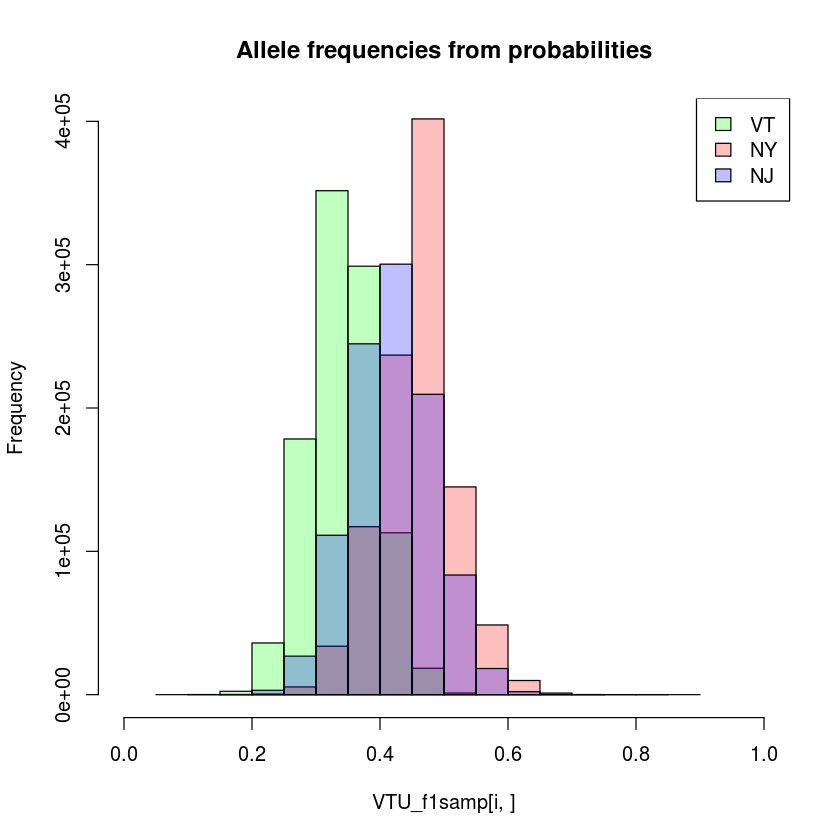

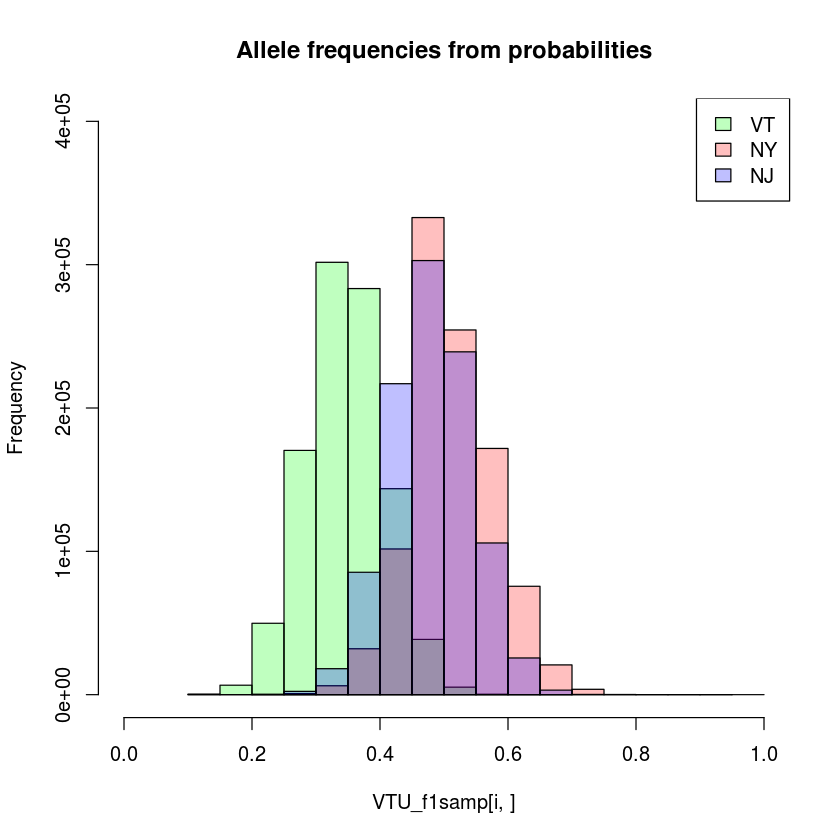

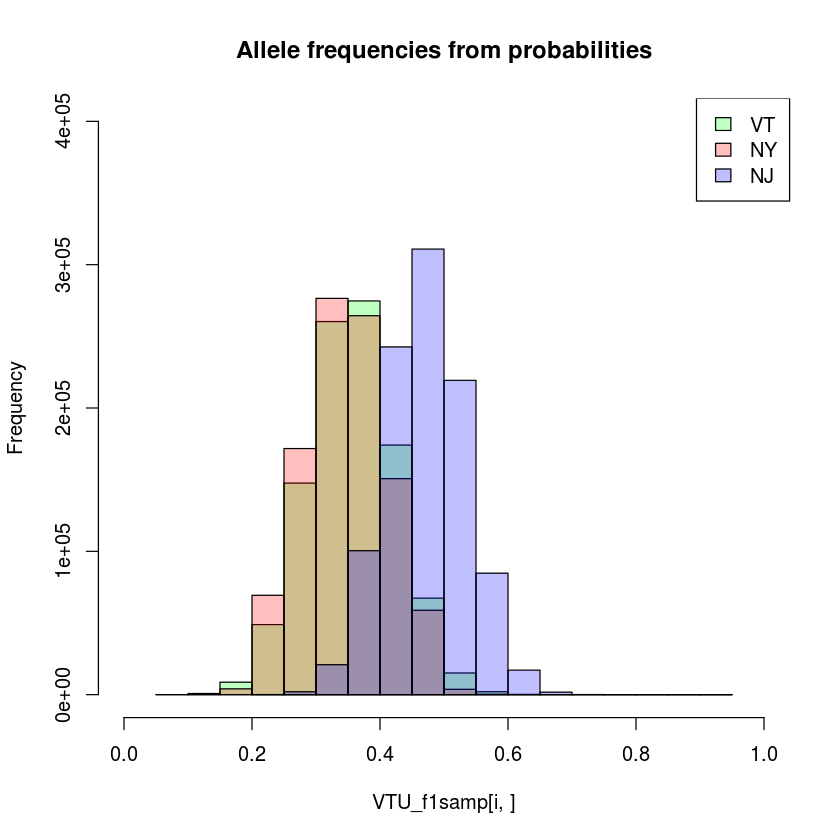

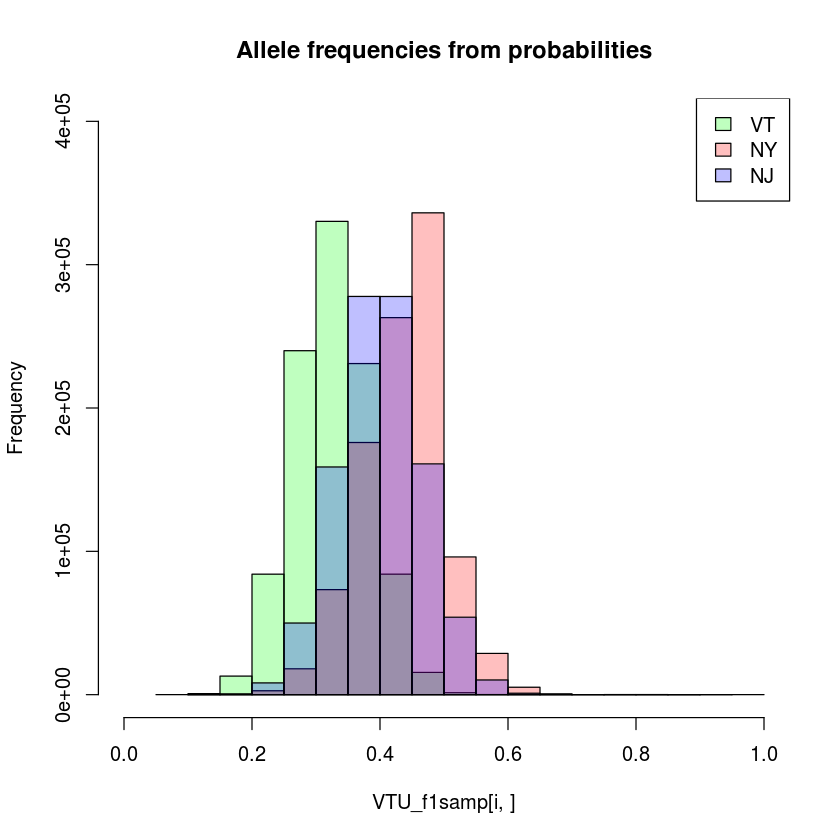

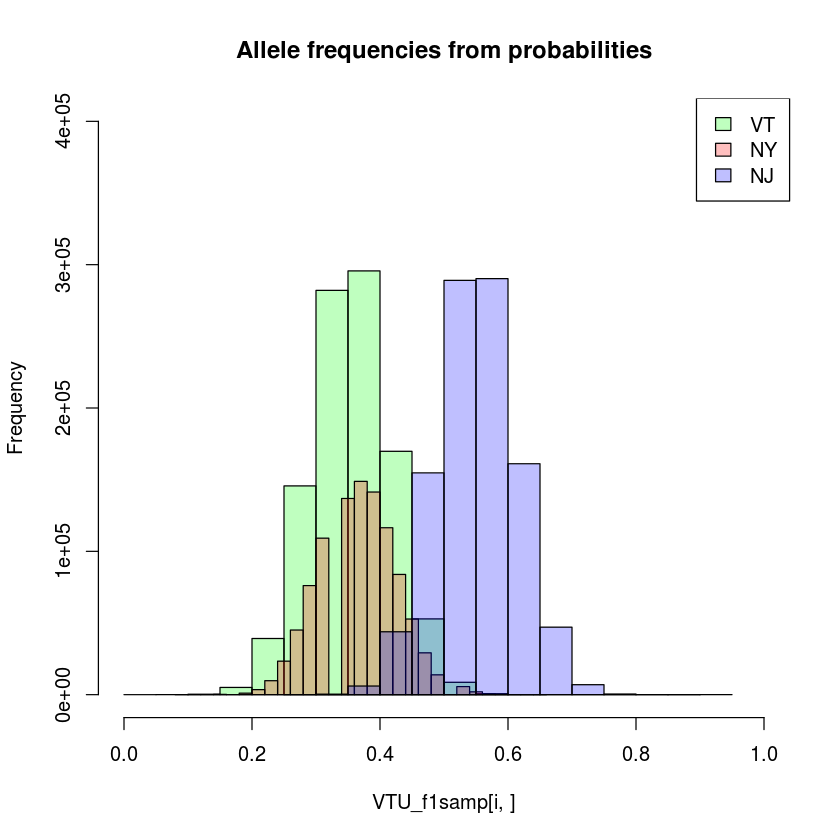

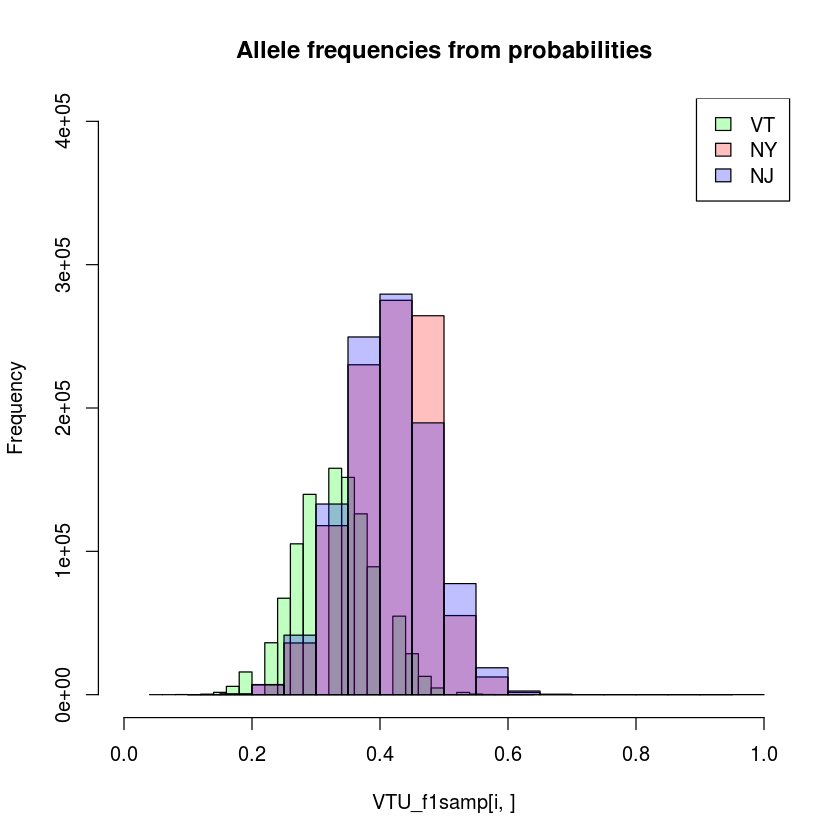

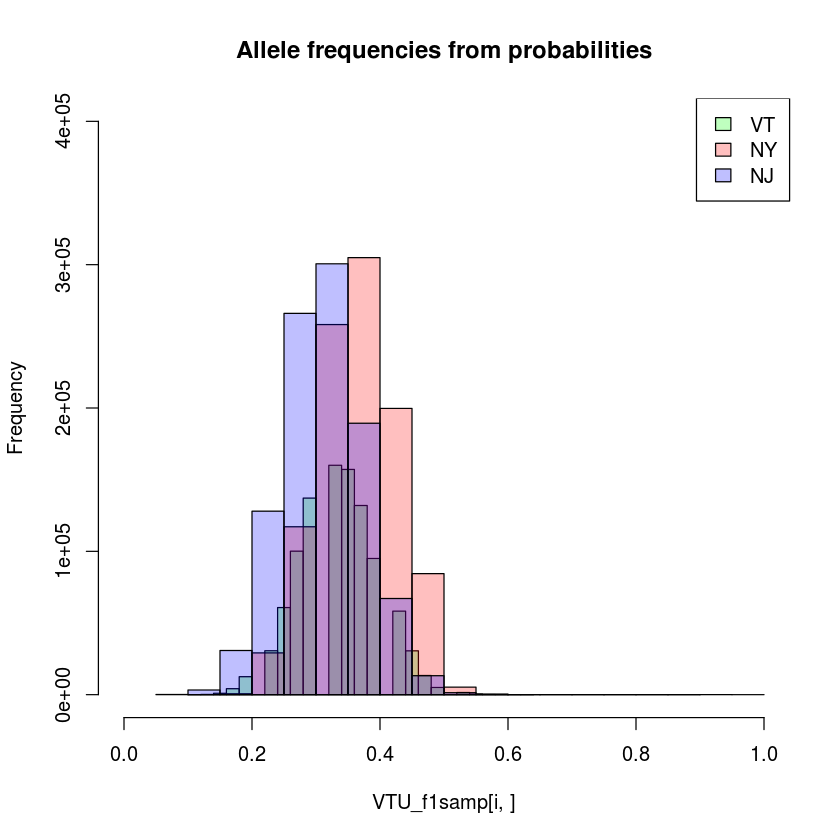

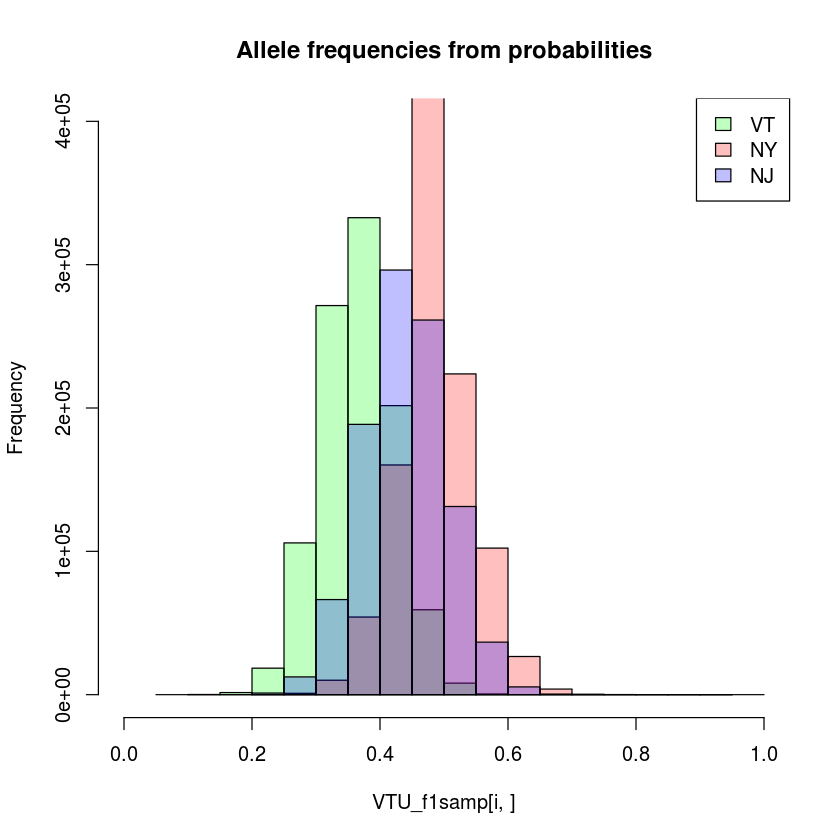

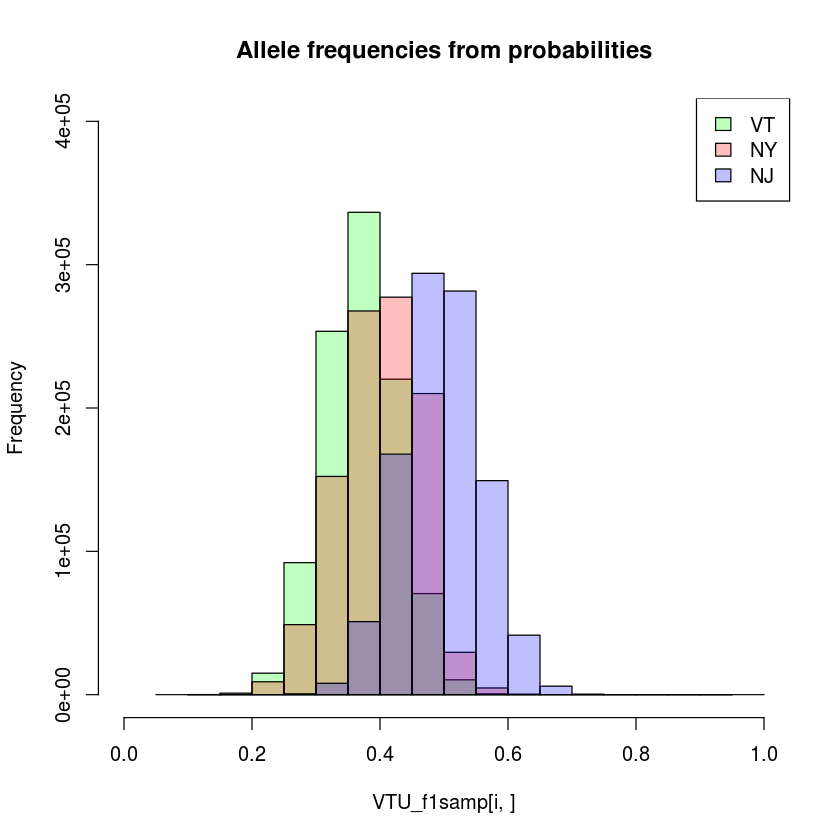

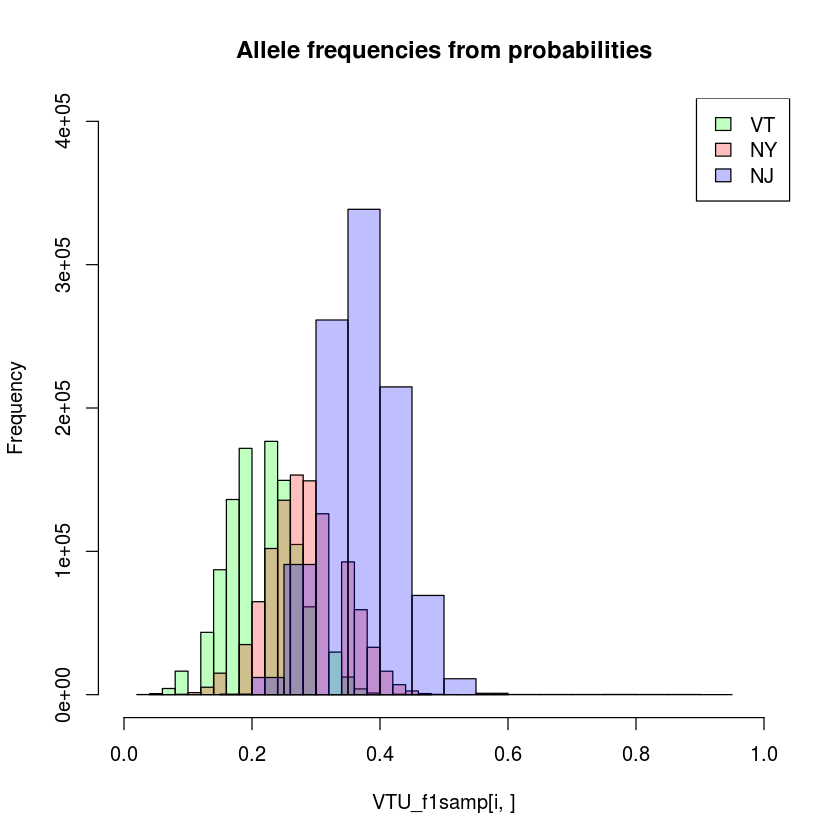

In [81]:
for (i in 1:NROW(NYU_f1samp)) 
{
    assign("VTU_plot", hist(VTU_f1samp[i,], plot=FALSE))
    assign("NYU_plot", hist(NYU_f1samp[i,], plot=FALSE))
    assign("NJU_plot", hist(NJU_f1samp[i,], plot=FALSE))
    plot(VTU_plot, main="Allele frequencies from probabilities", col=rgb(0,1,0,1/4), ylim=c(0,400000), xlim=c(0,1))
    plot(NYU_plot, add=T, col=rgb(1,0,0,1/4))
    plot(NJU_plot, add=T, col=rgb(0,0,1,1/4)) 
    legend("topright", c("VT", "NY", "NJ"), fill=c(rgb(0,1,0,1/4),rgb(1,0,0,1/4),rgb(0,0,1,1/4)))
    }

Questions:
Do I need to repeate wfs as well? or is picking new genotypes each time enough replication?
actual minor allele frequencies differ from these ones. 
I'm confused how I have genotype probabilities for samples where I didnt think we had coverage according to nIND? is it because its a probability that is based on something else?

Still need to test on some that arent outliers. 
can we fit the null model to a distribution to get the ends. 